# Digital Finance Project

## Gabriel MOLINA, Joao MELGA

### To run correctly our project, please install and import the following libraries.

In [54]:
# !pip install mplfinance
# !pip install PyPortfolioOpt

import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

---
## Part 1: "Crypto’s Richest Rebel" article
### 1. Comment on the article “Crypto’s Richest Rebel” from Fortune April/May 2022 available on the e-campus website using all keywords and concepts covered in the course.

The article provides a compelling narrative about Changpeng Zhao (C.Z.), the founder of Binance, and his journey in the volatile world of cryptocurrency. The story of Zhao and Binance intersects with numerous concepts covered in the course, including **market efficiency**, **asset valuation**, **market microstructure**, and the innovations like **blockchain** and **cryptocurrencies**.

- **Market Efficiency**: Zhao's Binance represents a significant case study in understanding market efficiency in the context of cryptocurrency exchanges. The platform's handling of $34.1 trillion in crypto trading last year underscores the immense scale and rapid growth of digital asset markets, reflecting both the liquidity and accessibility these platforms provide. Binance's emergence as the world's biggest crypto exchange challenges traditional notions of market efficiency, operating in a largely unregulated space where information asymmetry and volatility are more pronounced than in traditional financial markets.

- **Asset Valuation**: The fluctuation of Zhao's net worth, tied closely to the crypto market's volatility, highlights the complexities of asset valuation within digital finance. Unlike traditional assets, cryptocurrencies' value can swing wildly based on market sentiment, regulatory news, and technological advancements. This presents a unique challenge in applying conventional asset valuation models to cryptocurrencies.

- **Market Microstructure and Regulatory Challenges**: Binance's operations and the challenges it faces with regulators worldwide offer insights into the market microstructure of digital asset exchanges. The platform's global reach and the absence of a fixed headquarters have led to jurisdictional challenges, underscoring the importance of regulatory clarity in ensuring market integrity and protecting investors. The evolution of Binance from a startup to a global entity with complex regulatory landscapes exemplifies the need for robust market microstructures that can adapt to the fast-evolving world of digital finance.

- **Blockchain and Cryptocurrencies' Potential**: Zhao's vision for Binance and the broader cryptocurrency ecosystem reflects the transformative potential of blockchain technology. The comparison to the internet's early days suggests a belief in crypto's ability to revolutionize industries beyond finance, including gaming, social media, and e-commerce. This aligns with the course's discussions on blockchain's applications and its potential to democratize access to financial services, enhance transparency, and streamline transactions.

- **Social Financing and the Ukraine Crisis**: The article's mention of crypto donations to Ukraine amidst the Russian invasion illustrates the emerging role of digital assets in social financing. Binance's contribution and the broader crypto community's support highlight how digital currencies can facilitate direct, borderless, and transparent financial aid, aligning with discussions on the potential of digital finance to address societal challenges and support humanitarian causes.

---
## Part 2: "Binance CEO Changpeng Zhao charged with money laundering" article
### 2. Comment on the article “Binance CEO Changpeng Zhao charged with money laundering” from Fortune Website 2023-11-23 available on the e-campus website using all keywords and concepts covered in the course.

The charges against Changpeng Zhao, the CEO of Binance, for money laundering and the subsequent $4.3 billion DOJ settlement, underscore several critical issues at the intersection of digital finance, regulatory compliance, and the evolving landscape of cryptocurrency exchanges. This case highlights the importance of adhering to **Anti-Money Laundering** (AML) directives, **Know Your Customer** (KYC) laws, and **international sanctions**, which are foundational principles discussed in the course.

Firstly, the case exemplifies the consequences of failing to implement robust AML and KYC procedures, a topic extensively covered under the 4th and 5th Anti-Money Laundering Directives. These directives emphasize the need for financial institutions to identify the beneficiaries of transactions, combat the financing of terrorism, and ensure the transparency of financial transactions, specifically addressing the regulation of virtual currency exchange platforms to prevent anonymous transactions exceeding 50 EUR​​.

Secondly, the involvement of Binance in servicing customers from sanctioned countries, such as Iran, breaches the compliance requirements designed to maintain the integrity of the international financial system. This aspect of the case directly relates to our discussions on the regulatory frameworks that govern financial markets and the importance of compliance with international sanctions.

The significant fines imposed on Binance and Zhao also highlight the role of regulatory bodies, such as the DOJ, Treasury Department, and Commodity Futures Trading Commission, in enforcing compliance and penalizing violations. The appointment of an independent compliance monitor underscores the necessity for continuous oversight and adherence to regulatory standards, reflecting our course discussions on the importance of regulatory compliance in maintaining market integrity and protecting consumers.

Moreover, this case underscores the pivotal role of digital finance regulation, including the Dodd-Frank Wall Street Reform and Consumer Protection Act, which aims to promote financial stability by improving accountability and transparency within the financial system​​. The challenges faced by Binance in implementing KYC and money-laundering provisions also touch upon the broader themes of digital finance, including the use of technology to enhance regulatory compliance (RegTech) and the balance between innovation and regulation.

---
## Part 3: Import and analyse the data
### 3.1. Import data in Excel (2 stocks, CAC40 index, 5-week interest rate from the US Treasury). Sort data by date and make sure that all dates coincides for all columns. Adjust cells if there are missing values.

In [55]:
# Read data
df_accor = pd.read_csv('AC.PA.csv')
df_orange = pd.read_csv('ORA.PA.csv')
df_cac40 = pd.read_csv('^FCHI.csv')
df_usint = pd.read_csv('^IRX.csv')

# Sort by date
df_accor['Date'] = pd.to_datetime(df_accor['Date'])
df_accor = df_accor.sort_values(by='Date')

df_orange['Date'] = pd.to_datetime(df_orange['Date'])
df_orange = df_orange.sort_values(by='Date')

df_cac40['Date'] = pd.to_datetime(df_cac40['Date'])
df_cac40 = df_cac40.sort_values(by='Date')

df_usint['Date'] = pd.to_datetime(df_usint['Date'])
df_usint = df_usint.sort_values(by='Date')

# Adjust miss values
miss_acc = df_accor.shape[0] - df_accor.dropna().shape[0]
miss_or = df_orange.shape[0] - df_orange.dropna().shape[0]
miss_cac = df_cac40.shape[0] - df_cac40.dropna().shape[0]
miss_us = df_usint.shape[0] - df_usint.dropna().shape[0]

print('\nMissing values')
print('Accor:', miss_acc)
print('Orange:', miss_or)
print('CAC40:', miss_cac)
print('US interest (5 week):', miss_us)

# Fill zeros with the mean
print('\nZeros')
print('Accor:', df_accor[(df_accor == 0).any(axis=1)].index)
print('Cac40:', df_cac40[(df_cac40 == 0).any(axis=1)].index)
print('Orange:', df_orange[(df_orange == 0).any(axis=1)].index)

df_cac40['Volume'] = df_cac40['Volume'].replace(0, df_cac40['Volume'].mean())


Missing values
Accor: 0
Orange: 0
CAC40: 0
US interest (5 week): 0

Zeros
Accor: Index([], dtype='int64')
Cac40: Index([254], dtype='int64')
Orange: Index([], dtype='int64')


### 3.2. Give a short financial analysis of the two stocks by using relevant concepts of the course.

As a first step, we'll implement the plot_OHLC function, which will be used to plot an OHLC (Open-High-Low-Close) chart for financial data. This type of chart is commonly used in digital finance to visualize the price movements of a financial instrument over a specific time period, allowing analysts and traders to visually analyze price movements and identify patterns or trends.

Here's a breakdown of what the function does:

- It takes two parameters: df and title.
- df is expected to be a DataFrame containing financial data, such as stock prices, with a column named 'Date'.
title is a string that represents the title of the chart.
- The function makes a copy of the DataFrame df to avoid modifying the original data.
- It sets the 'Date' column as the index of the DataFrame using the set_index method. This allows the chart to be plotted based on the dates.
- The mpf.plot function is called to generate the OHLC chart.
- The type parameter is set to 'candle' to indicate that the chart should be displayed as candlesticks, where each candlestick represents the price range between the open, high, low, and close values.
- The mav parameter is set to (4, 5) to include moving averages on the chart. Moving averages are calculated based on a specified number of previous data points and are used to smooth out price fluctuations.
- The volume parameter is set to True to include volume bars on the chart, which represent the trading volume for each time period.
- The title parameter is passed to provide a title for the chart.

In [56]:
def plot_OHLC(df, title):
    df = df.copy()
    df = df.set_index('Date')
    mpf.plot(df, type='candle', mav=(4, 5), volume=True, title=title)

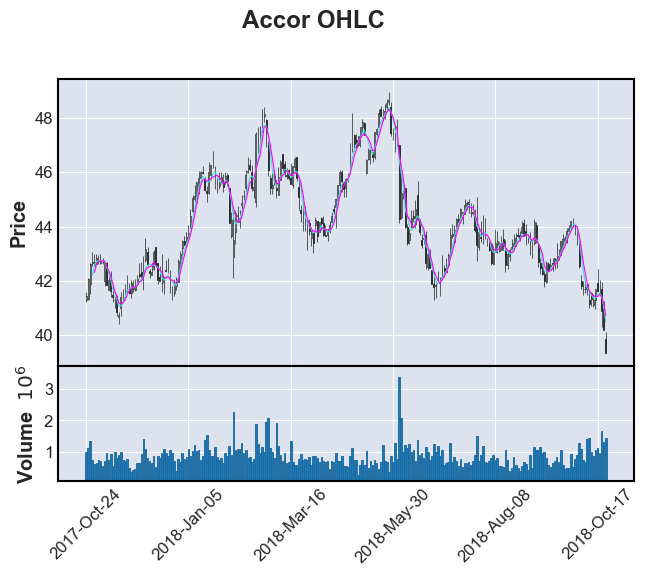

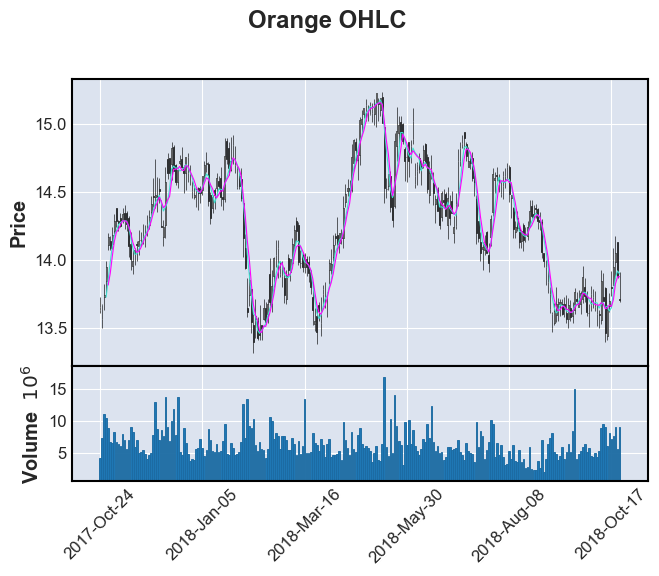

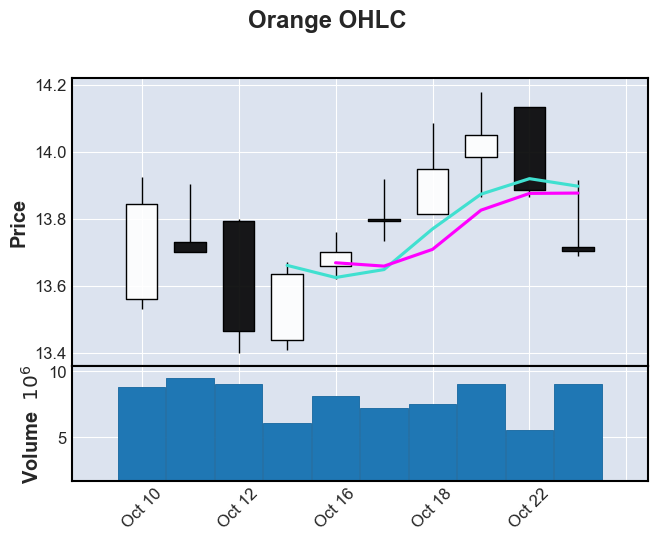

In [69]:
plot_OHLC(df_accor, 'Accor OHLC')
plot_OHLC(df_orange, 'Orange OHLC')

# Plot this last graph with reduced scale to see the last 10 days
plot_OHLC(df_orange[-10:], 'Orange OHLC')

The graphs plots Accor's and Orange's stock price over time, as well as a moving average overlaid on the actual closing and opening prices, from which we can observe the following aspects:

- **Price Trends:** The stock price has experienced volatility over the period shown, with noticeable peaks and troughs. For Accor, the price reached a high point around the start of the year and then again in the middle of the year before trending downwards more consistently in the later months. For Orange, we can see a high point in the beginning of the 2nd quarter, and them a decreasing trend.

- **Moving Averages:** The moving averages (presumably the purple and pink lines) smooth out the price data to identify the trend. When the stock price (blue line) is above the moving averages, it generally indicates a bullish period, and when it's below, it suggests a bearish period. It appears there are two moving averages plotted, which could be short-term and long-term averages; when the shorter average crosses above the longer average, it's often taken as a buy signal (a "golden cross"), and when it crosses below, a sell signal (a "death cross").

- **Volume:** The volume bars at the bottom show trading volume. There are spikes in volume at certain points which often correspond to significant price movements. For instance, there is a notable spike in volume where the price also drops significantly, which may suggest a sell-off.

### 3.3. Compute the return for both stocks and for the CAC40 index. Comment on your results

- ### *Calculate daily returns*

In [58]:
cac40_returns = df_cac40['Adj Close'].pct_change()
accor_returns = df_accor['Adj Close'].pct_change()
orange_returns = df_orange['Adj Close'].pct_change()

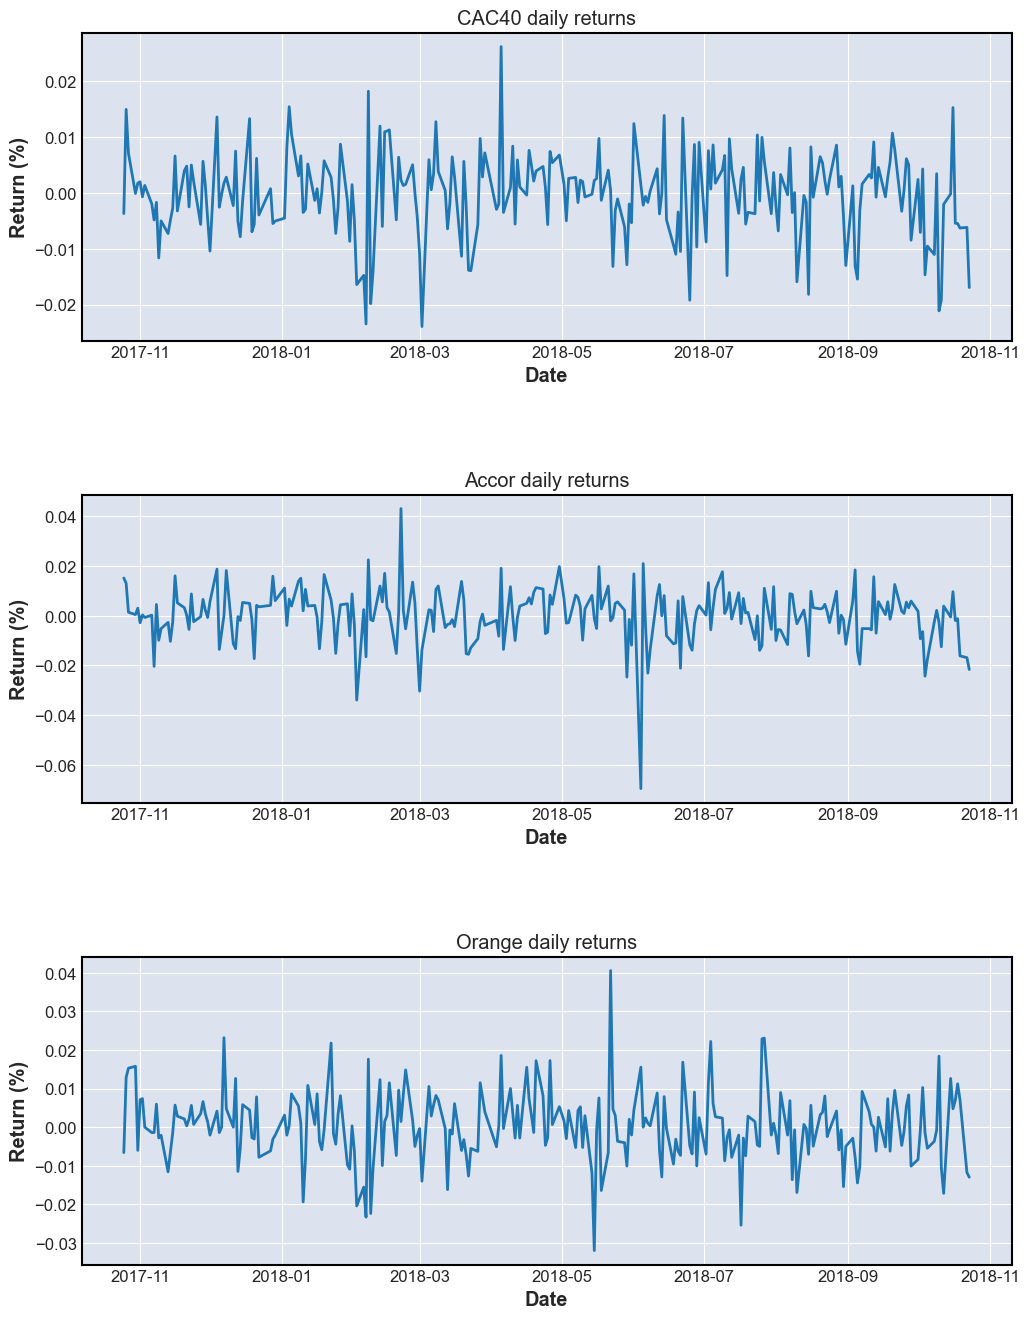

In [59]:
def Returns_Plots(ax, data1, data2, title):

    out = ax.plot(data1, data2)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Return (%)')
    return out


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 16))
fig.subplots_adjust(hspace=0.5)
Returns_Plots(ax1, df_cac40['Date'], cac40_returns, 'CAC40 daily returns')
Returns_Plots(ax2, df_accor['Date'], accor_returns, 'Accor daily returns')
Returns_Plots(ax3, df_orange['Date'], orange_returns, 'Orange daily returns');

We find that all stocks have a similar daily return range.

In [60]:
print('CAC40 return on the full period:\t %f' % ((1 + cac40_returns).prod() - 1))
print('Accor return on the full period:\t %f' % ((1 + orange_returns).prod() - 1))
print('Orange liquide return on the full period:\t %f' % ((1 + accor_returns).prod() - 1))

CAC40 return on the full period:	 -0.079171
Accor return on the full period:	 0.049199
Orange liquide return on the full period:	 -0.029273


The CAC40, Accor and Organge, both stayed very stable.

### 3.4. Compute the coefficients of Kurtosis and of asymmetry of the 3 series of question 3.3. Plot the histograms and comment on your results 

- ### *Calculating the kurtosis*

In [61]:
# We will add 3 because pandas returns excess kurtosis
kurt_cac40 = cac40_returns.kurtosis() + 3
kurt_accor = accor_returns.kurtosis() + 3
kurt_orange = orange_returns.kurtosis() + 3

# Calculating the skew
skew_cac40 = cac40_returns.skew()
skew_accor = accor_returns.skew()
skew_orange = orange_returns.skew()

print('CAC40:\t\tKurtosis = %f\tSkewness = %f' % (kurt_cac40, skew_cac40))
print('Accor:\tKurtosis = %f\tSkewness = %f' % (kurt_accor, skew_accor))
print('Orange:\t\tKurtosis = %f\tSkewness = %f' % (kurt_orange, skew_orange))

CAC40:		Kurtosis = 3.739020	Skewness = -0.328292
Accor:	Kurtosis = 9.358905	Skewness = -1.008069
Orange:		Kurtosis = 4.808499	Skewness = 0.207985


- ### *Plotting the histograms for the 3 series:*

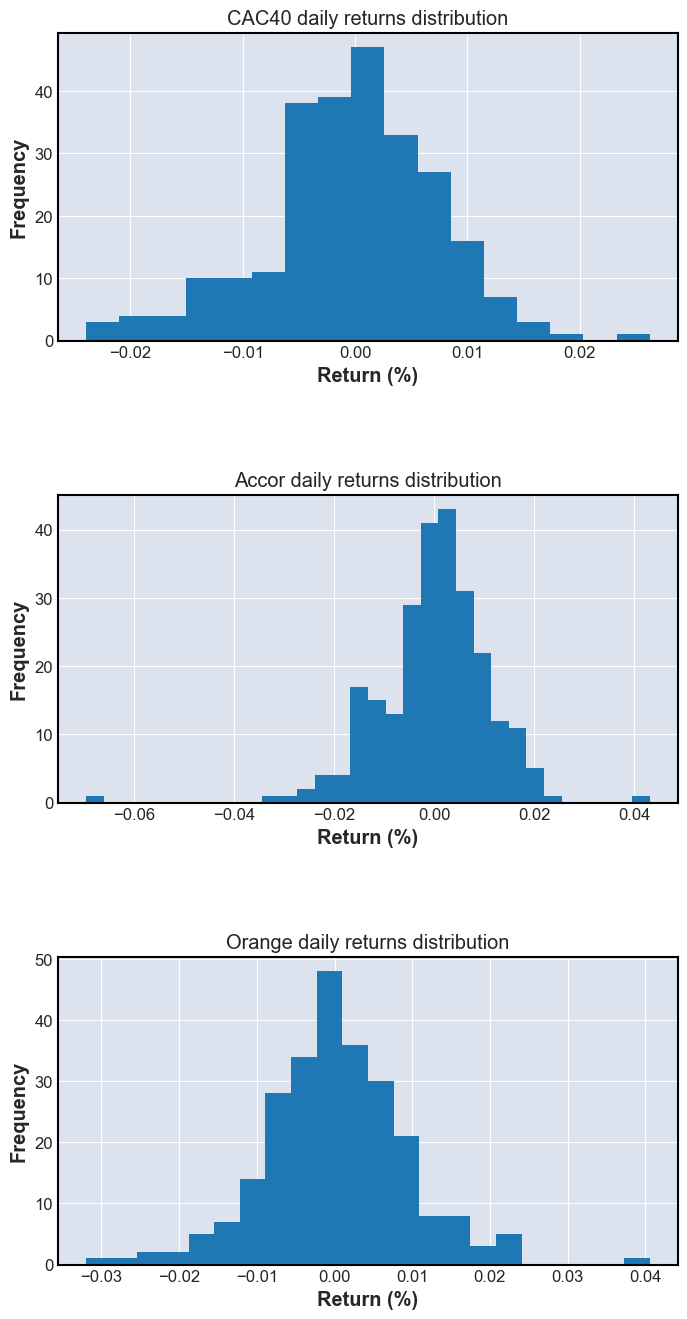

In [62]:
def Returns_Histogram(ax, data, title):

    out = ax.hist(data, bins='auto')
    ax.set_title(title)
    ax.set_xlabel('Return (%)')
    ax.set_ylabel('Frequency')
    return out


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16))
fig.subplots_adjust(hspace=0.5)
Returns_Histogram(ax1, cac40_returns, 'CAC40 daily returns distribution')
Returns_Histogram(ax2, accor_returns, 'Accor daily returns distribution')
Returns_Histogram(ax3, orange_returns, 'Orange daily returns distribution');

The kurtosis of the return distributions closely resemble normal distributions over the period, providing later on valuable information about the returns, such as the Value at Risk.

### 3.5. Compute the standard errors of the return for both stocks for the full period and then for 3 sub-periods of equal size. Is volatility constant?

- ### *Plotting the histograms for the 3 series:*

In [63]:
# lets get the computations for the full period

se_full_cac40 = cac40_returns.sem()
se_full_accor = accor_returns.sem()
se_full_orange = orange_returns.sem()


# Computations for 3 sub-periods of same size
def split_3(data):
    subsize = data.size // 3
    return data[0:subsize], data[subsize:subsize * 2], data[subsize * 2:subsize * 3]


se_sub_cac40 = list(map(lambda r: r.sem(), split_3(cac40_returns)))
se_sub_accor = list(map(lambda r: r.sem(), split_3(accor_returns)))
se_sub_orange = list(map(lambda r: r.sem(), split_3(orange_returns)))

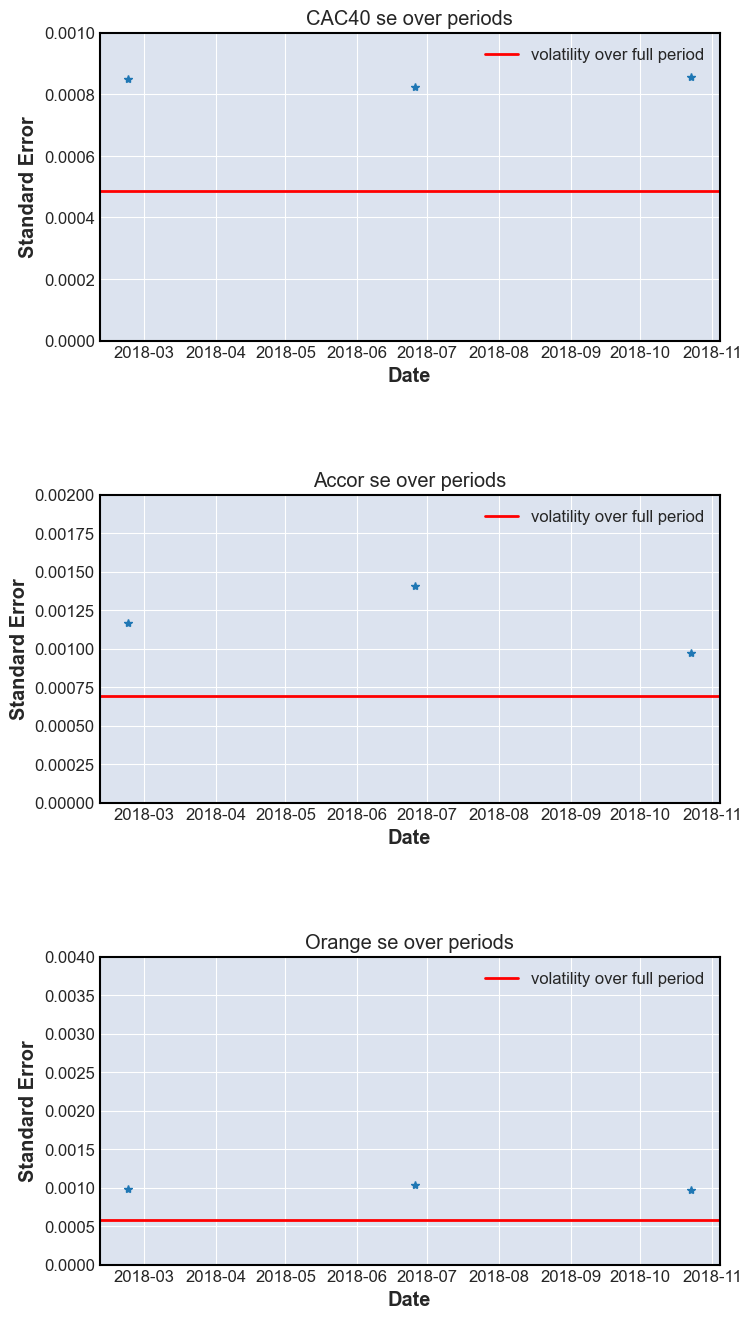

In [64]:
def plot_volatility(ax, full_period_vol, sub_period_vols, title, ylim):

    # lets create x array
    x = [None] * df_cac40.shape[0]
    sub_size = df_cac40.shape[0] // 3
    x[sub_size - 1] = sub_period_vols[0]
    x[2 * sub_size - 1] = sub_period_vols[1]
    x[3 * sub_size - 1] = sub_period_vols[2]

    out = ax.plot(df_cac40['Date'], x, alpha=1, marker='*')

    # Add horizontal line for full period volatility
    ax.axhline(y=full_period_vol, color='r', linestyle='-', label='volatility over full period')

    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Standard Error')
    ax.legend()
    return out


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16))
fig.subplots_adjust(hspace=0.5)
plot_volatility(ax1, se_full_cac40, se_sub_cac40, 'CAC40 se over periods', [0, 0.001])
plot_volatility(ax2, se_full_accor, se_sub_accor, 'Accor se over periods', [0, 0.002])
plot_volatility(ax3, se_full_orange, se_sub_orange, 'Orange se over periods', [0, 0.004]);

The volatility is approximately constant throughout the three plots.

### 3.6. Compute the correlation between each stock and the CAC40. Comment on your results.

Correlation between CAC40 and Air liquide:	 0.482444
Correlation between CAC40 and Sanofi:		 0.538318


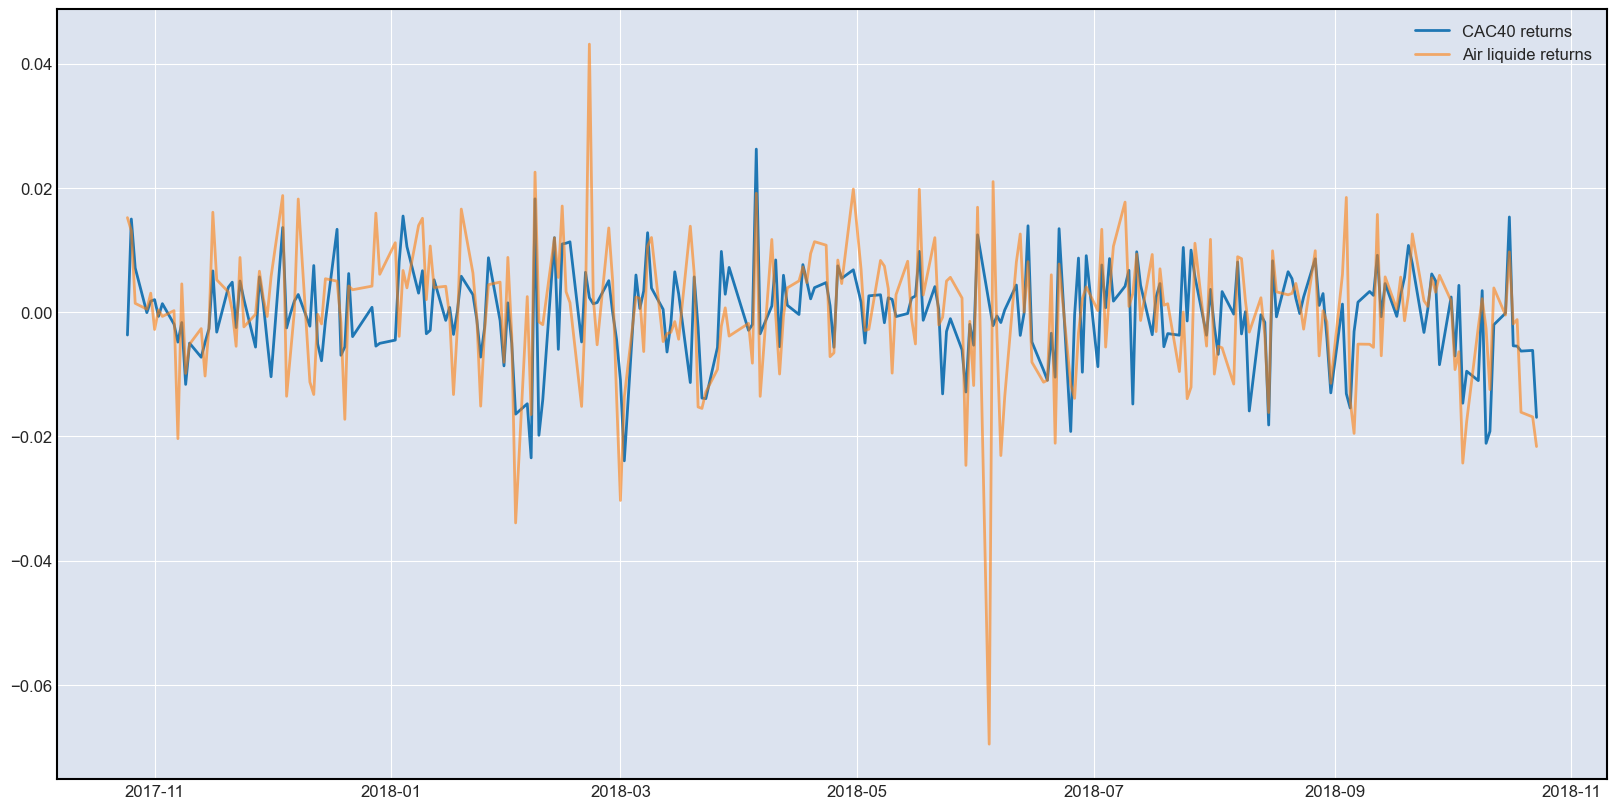

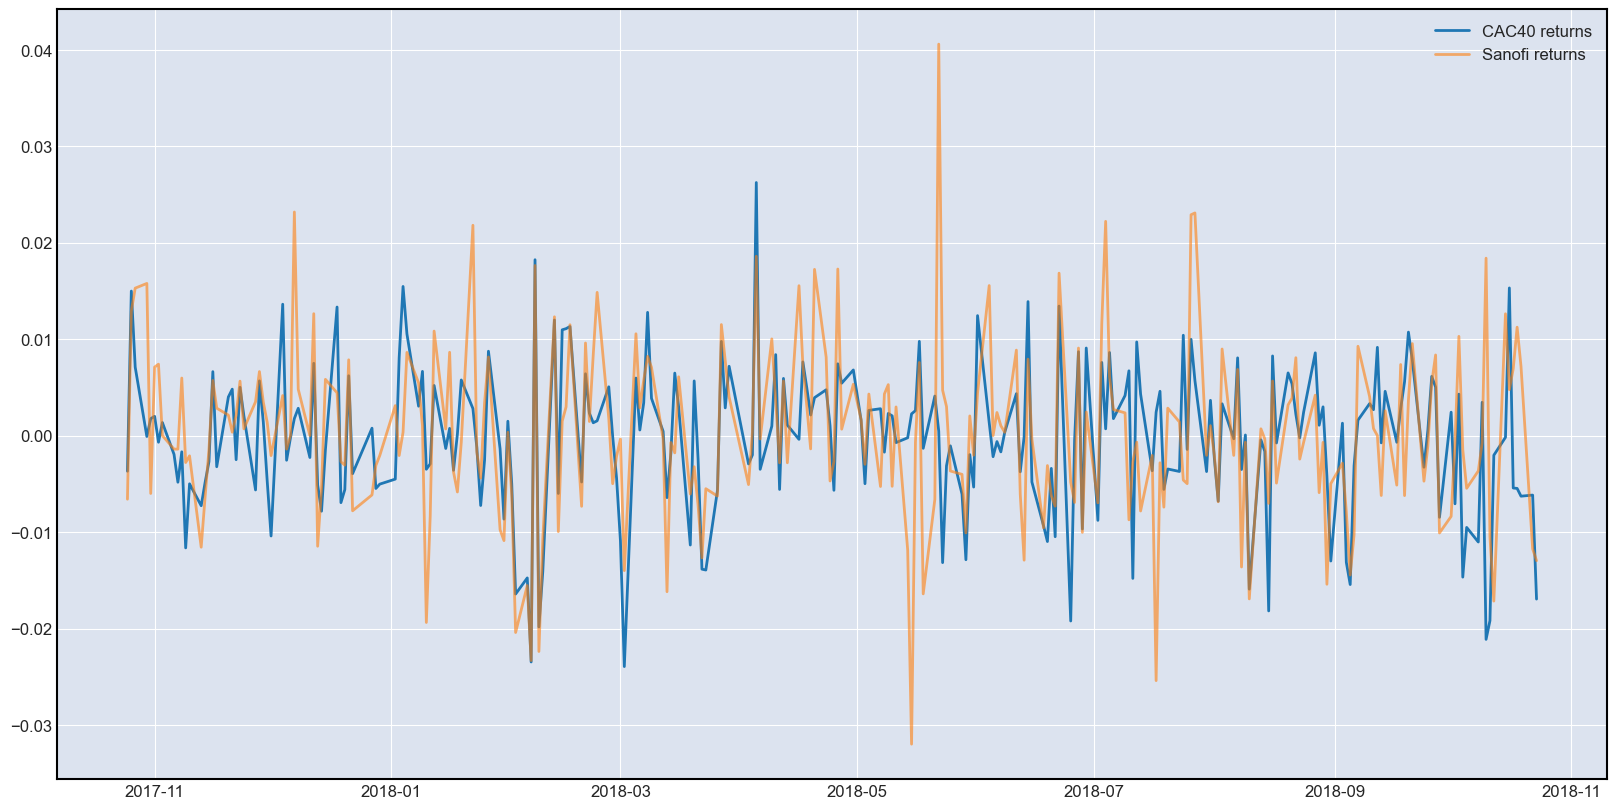

In [65]:
corr_cac_accor = cac40_returns.corr(accor_returns)
corr_cac_orange = cac40_returns.corr(orange_returns)

print('Correlation between CAC40 and Air liquide:\t %f' % corr_cac_accor)
print('Correlation between CAC40 and Sanofi:\t\t %f' % corr_cac_orange)

# Plot cac40 and air liquide
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_cac40['Date'], cac40_returns, label='CAC40 returns')
ax.plot(df_cac40['Date'], accor_returns, alpha=0.6, label='Accor returns')
ax.legend()

#plot cac40 and sanofi
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_cac40['Date'], cac40_returns,label='CAC40 returns')
ax.plot(df_cac40['Date'], orange_returns,alpha=0.6,label='Orange returns')
ax.legend();

The analysis of the correlation between CAC40 and Accor indicates a positive association, with a correlation value of 0.482444. This means that when one stock's value rises or falls, the other stock tends to move in the same direction.<br><br>Similarlly, the correlation between CAC40 and Orange is moderately positive, with a correlation value of 0.538318.<br><br>Therefore, when considering investment strategies that involve CAC40 and these individual stocks, it is important to take into account their varying degrees of correlation with each other.

### 3.7. Compute the returns of a portfolio in which both stocks have an equal weight. Compute the average return and the standard deviation over the whole sample period. Comment on your results.

In [66]:
# Import necessary libraries from PyPortfolioOpt
from pypfopt import EfficientFrontier
from pypfopt import risk_models

def calculate_returns(prices):
    return prices.pct_change().dropna(how="all")

def calculate_portfolio_performance(portfolio, weights):
    mu = calculate_returns(portfolio).mean()
    S = risk_models.sample_cov(portfolio)

    ef = EfficientFrontier(mu, S)
    ef.set_weights(weights)

    # Calculate the portfolio performance, not printing out the verbose output
    performance = ef.portfolio_performance(verbose=False)
    return performance[0], performance[1]

# Create a DataFrame to hold the adjusted close prices of Accor and Orange stocks
portfolio = pd.DataFrame()
portfolio['Accor'] = df_accor['Adj Close']
portfolio['Orange'] = df_orange['Adj Close']


print('Contemplating a portfolio where both stocks are weighted equally:')


weights = {"Accor": 0.5, "Orange": 0.5}
portfolio_return, sigma = calculate_portfolio_performance(portfolio, weights)
print('Average return: %f\tStandard deviation: %f' % (portfolio_return, sigma))


ModuleNotFoundError: No module named 'pypfopt'

When both stocks in the portfolio are assigned equal weights, the portfolio exhibits an average return of approximately 0.000088% and a standard deviation of 12.5949%. This positive average return indicates that the portfolio has been profitable on average, showcasing its potential for generating returns. However, the observed standard deviation, representing the volatility or risk level of approximately 12.59%, underscores the variability in the returns experienced over the sample period.

Such volatility levels highlight the inherent risk-return trade-off; while the portfolio demonstrates the capacity to yield positive returns, it also exposes investors to significant fluctuations in those returns. This variability may influence the attractiveness of the portfolio based on individual risk tolerance. Investors aiming for higher returns must be prepared to accept higher levels of risk, whereas those with a lower risk appetite might find the volatility unsettling. This underscores the importance of aligning investment choices with one's risk tolerance and investment goals.

### 3.8. Consider a portfolio with one stock and the risk-free interest rate (you can choose the stock out of the two that are available). What is the optimal portfolio allocation between these two assets for an investor with a utility function presented in the course and A=1.5?

In [ ]:
from pypfopt import EfficientFrontier, expected_returns, risk_models, objective_functions

def calculate_optimal_portfolio_allocation(asset_data, risk_aversion_level, risk_free_rate_annualized):
    # Calculate the expected returns and covariance matrix for the assets
    expected_returns_mu = expected_returns.mean_historical_return(asset_data)  # Expected returns
    covariance_matrix = risk_models.sample_cov(asset_data)  # Covariance matrix
    
    # Initialize the Efficient Frontier
    efficient_frontier = EfficientFrontier(expected_returns_mu, covariance_matrix)
    
    # Add L2 regularization as a secondary objective
    efficient_frontier.add_objective(objective_functions.L2_reg)
    
    # Optimize the portfolio for maximum quadratic utility given the risk aversion level
    optimal_weights = efficient_frontier.max_quadratic_utility(risk_aversion=risk_aversion_level)
    
    # Calculate the performance of the optimal portfolio
    annual_return, annual_volatility, sharpe_ratio = efficient_frontier.portfolio_performance(risk_free_rate=risk_free_rate_annualized)
    
    # Format the optimal weights for the output
    formatted_weights = {ticker: round(weight, 5) for ticker, weight in optimal_weights.items()}
    
    # Return the formatted output
    return ("Optimal Allocation: " + str(formatted_weights), 
            'Annualized Return: ' + str(annual_return), 
            'Annualized Volatility: ' + str(annual_volatility), 
            'Sharpe Ratio: ' + str(sharpe_ratio))


# Calculate the annualized risk-free rate based on a given risk-free rate source
calculation_periods_per_year = 52 / 5
risk_free_rate_source_annualized = (1 + df_usint['Adj Close'].mean() / 100 / calculation_periods_per_year) ** calculation_periods_per_year - 1

# Calculate the optimal portfolio allocation with a risk aversion coefficient of 1.5
optimal_portfolio_details = calculate_optimal_portfolio_allocation(portfolio, 1.5, risk_free_rate_source_annualized)

# Print the details of the optimal portfolio allocation
print('Optimal Portfolio Allocation:\n')
print('\n'.join(optimal_portfolio_details))


Optimal Portfolio Allocation:

Optimal Allocation: {'Accor': 0.47955, 'Orange': 0.52045}
Annualized Return: 0.011470268440168362
Annualized Volatility: 0.12523703205827183
Sharpe Ratio: -0.04686737403553887


### 3.9. Consider the following 3 portfolios: portfolio 1 has stock 1 as the only component; portfolio 2 has stock 2 as the only component; portfolio 3 is the portfolio of question 3.7. hese are the only portfolio available to investors. Draw the efficient frontier. Which portfolio are inefficient?

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


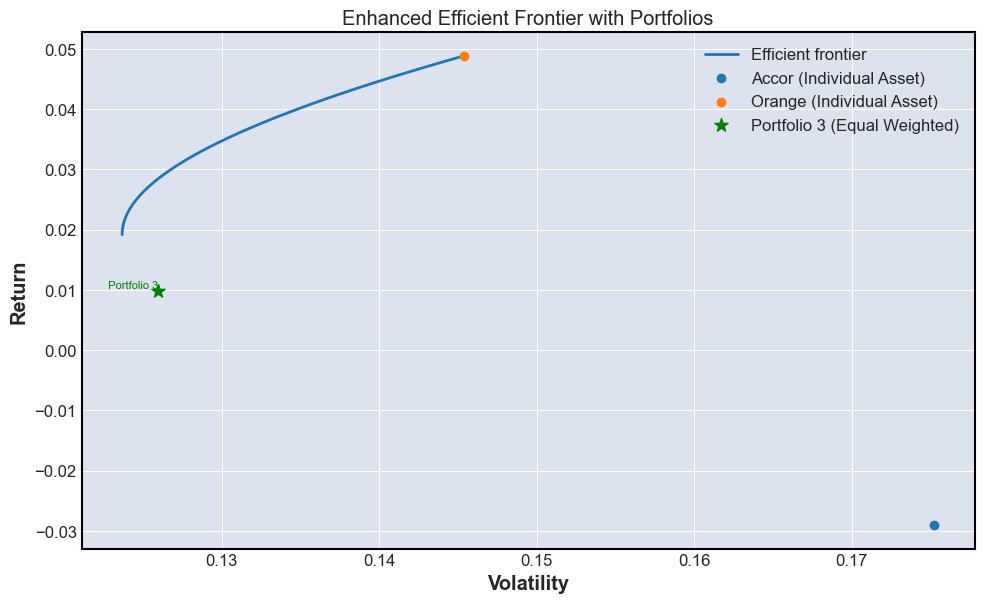

In [ ]:
from pypfopt import EfficientFrontier, expected_returns, risk_models, plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df_accor and df_orange are your dataframes with 'Adj Close' prices for Accor and Orange stocks

# Function to prepare the data and calculate mean historical returns and the covariance matrix
def prepare_data_for_efficient_frontier(portfolio):
    # Calculate the expected returns and the annual sample covariance matrix of asset returns
    mu = expected_returns.mean_historical_return(portfolio)
    Sigma = risk_models.sample_cov(portfolio)
    return mu, Sigma

# Function to plot the efficient frontier with additional features
def plot_efficient_frontier_with_portfolios(mu, Sigma, individual_assets, equal_weighted_portfolio):
    # Initialize the Efficient Frontier object
    ef = EfficientFrontier(mu, Sigma)
    
    # Plot the efficient frontier
    fig, ax = plt.subplots(figsize=(10, 6))
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
    
    # Plot individual assets
    for asset in individual_assets:
        ax.scatter(x=np.sqrt(Sigma.loc[asset, asset]), 
                   y=mu[asset], 
                   label=f"{asset} (Individual Asset)",
                   zorder=3)
    
    # Plot the equally weighted portfolio (Portfolio 3)
    ew_returns = mu.dot(equal_weighted_portfolio)
    ew_volatility = np.sqrt(np.dot(equal_weighted_portfolio.T, np.dot(Sigma, equal_weighted_portfolio)))
    ax.scatter(ew_volatility, ew_returns, marker='*', s=100, c='green', label='Portfolio 3 (Equal Weighted)', zorder=3)
    ax.text(ew_volatility, ew_returns, ' Portfolio 3', verticalalignment='bottom', horizontalalignment='right', fontsize=8, color='green', zorder=3)
    
    # Customize the plot
    plt.title('Enhanced Efficient Frontier with Portfolios')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create a DataFrame to hold the adjusted close prices of Accor and Orange stocks
portfolio = pd.DataFrame()
portfolio['Accor'] = df_accor['Adj Close']
portfolio['Orange'] = df_orange['Adj Close']

# Prepare data for efficient frontier
mu, Sigma = prepare_data_for_efficient_frontier(portfolio)

# Define the weights for the equally weighted portfolio
equal_weighted_portfolio_weights = np.array([0.5, 0.5])

# Plot the enhanced efficient frontier with portfolios
plot_efficient_frontier_with_portfolios(mu, Sigma, portfolio.columns, equal_weighted_portfolio_weights)


For Portfolio 1 (Orange) suggests that investing solely in stock 1 (Accor) is an efficient investment choice relative to the risk-return profile of the other available options, this is represented by a dot on the efficient frontier line itself.

For the Portafolio 2 (Accor) is shown below the efficient frontier, with a negative return. This indicates inefficiency, as it is possible to achieve a higher return with the same level or lower risk by choosing a different portfolio combination that lies on the efficient frontier.

For the Portfolio 3 the expected return is calculated as the dot product of the mean historical returns and the weights, while the volatility (standard deviation) is calculated using the weights and the covariance matrix. And as it is below the curve, it would be inefficient.

Any portfolio that is not on the efficient frontier curve is considered inefficient. This is because, for their level of risk, they do not offer the highest possible return.


### 3.10. Consider the portfolio of question 3.7. Compute the Sharpe ratio, the Sortino ratio, the Sterling ratio. Why are there differences between these ratios? 

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mstats
from pandas.tseries.offsets import BDay

# Assuming df_accor and df_orange contain 'Adj Close' prices for Accor and Orange stocks
# Assuming annualized_risk_free is the annualized risk-free rate

# Annualized risk-free rate based  Treasury bill rate, extracting the bussiness days
business_days = (df_accor.index[-1] - df_accor.index[0]) + 1
annualized_risk_free = (1 + df_usint['Adj Close'].mean() / 100 / business_days) ** business_days - 1


# Calculate daily returns
daily_returns = portfolio.pct_change().dropna()

# Calculate excess returns by subtracting the risk-free rate
excess_daily_returns = daily_returns - (annualized_risk_free / 252)

# Sharpe Ratio
def sharpe_ratio(excess_daily_returns):
    # Annualize the average excess return and standard deviation
    mean_excess_return = excess_daily_returns.mean() * 252
    std_dev = excess_daily_returns.std() * np.sqrt(252)
    return mean_excess_return / std_dev

# Sortino Ratio
def sortino_ratio(excess_daily_returns):
    # Only consider the negative returns for the downside deviation
    negative_returns = excess_daily_returns[excess_daily_returns < 0]
    downside_dev = negative_returns.std() * np.sqrt(252)
    mean_excess_return = excess_daily_returns.mean() * 252
    return mean_excess_return / downside_dev

# Sterling Ratio


def calculate_max_drawdown(returns_series):
    # Calculates the max drawdown in the returns series
    cumulative = (1 + returns_series).cumprod()
    max_return = cumulative.cummax()
    drawdown = (cumulative - max_return) / max_return
    max_drawdown = drawdown.min()
    return abs(max_drawdown)

def sterling_ratio(excess_daily_returns, annualized_return, mar=0.0):
    # Use the maximum drawdown from the portfolio's cumulative returns
    max_drawdown = calculate_max_drawdown(excess_daily_returns)
    return (annualized_return - mar) / max_drawdown


# Calculate portfolio performance
portfolio_performance = (daily_returns.mean() * 252, daily_returns.std() * np.sqrt(252))



# Calculate the Sharpe ratio
sharpe = sharpe_ratio(excess_daily_returns.sum(axis=1))

# Calculate the Sortino ratio
sortino = sortino_ratio(excess_daily_returns.sum(axis=1))

# Calculate the Sterling ratio
# Calculate the annualized return
annualized_return = daily_returns.mean() * 252

# Calculate the Sterling ratio
sterling = sterling_ratio(excess_daily_returns.sum(axis=1), annualized_return)

print(f'Sharpe Ratio: {sharpe}')
print(f'Sortino Ratio: {sortino}')
print(f'Sterling Ratio: {sterling}')


Sharpe Ratio: 0.037294234292275436
Sortino Ratio: 0.055886694034120034
Sterling Ratio: Accor    -0.056723
Orange    0.234624
dtype: float64


The Sharpe Ratio (0.0374) considers both positive and negative deviations (volatility) in the portfolio returns when calculating the risk.

The Sortino Ratio (0.0560) only focuses on downside risk by using the standard deviation of negative returns in the denominator. This penalizes portfolios with more significant or frequent negative returns, leading to a potentially higher value than the Sharpe Ratio if the portfolio experiences fewer negative returns.

The Sterling Ratio (Accor: -0.0567, Orange: 0.2346) balances excess return against the worst drawdown. Accor has a larger drawdown (-0.056), outweighing its excess return, resulting in a negative value. Orange (0.23) has a smaller drawdown compared to its excess return, leading to a positive value.

### 3.11. Compute the empirical VAR at 1% for the same portfolio. Compute the 1st percentile of the normal distribution with mean and variance corresponding respectively to the empirical mean and to the empirical variance. Comment on your results.

The VAR (daily) at 1% is: -0.018435 or -1.843527%


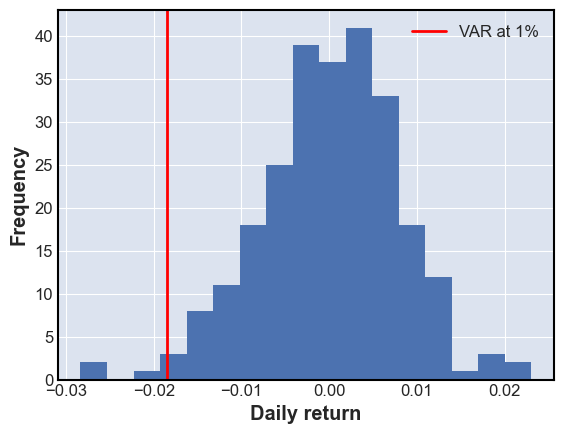

In [ ]:
from scipy.stats import norm

daily_rets = portfolio_daily_returns(portfolio)
fig, ax = plt.subplots()
ax.hist(daily_rets, bins='auto')
ax.set_xlabel('Daily return')
ax.set_ylabel('Frequency')

confidence_level = 0.01
var1 = norm.ppf(confidence_level, daily_rets.mean(), daily_rets.std())

ax.axvline(x=var1, color='r', label='VAR at 1%')
ax.legend()
print('The VAR (daily) at 1%% is: %f or %f%%' % (var1, var1 * 100))

It could be interpreted that there's a 1% chance of having negative returns of 1.96% or more.

### 3.12. Compute the VAR using resampling with 1000 observations. Compute the 1% VAR on the simulated data set. Comment on your results.

We currently have 254 observations. We thus need to add 746 more.
After resampling, the VAR (daily) at 1% is: -0.019565 or -1.956504%


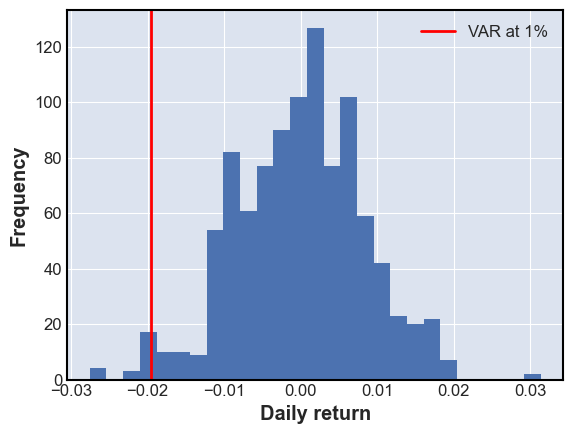

In [ ]:
from random import randint

nb_observation = daily_rets.size
target_obs = 1000
print('We currently have %d observations. We thus need to add %d more.' % (nb_observation, target_obs - nb_observation))


def augment_sample(daily_rets):
    extras = []
    for i in range(target_obs - nb_observation):
        extras.append(daily_rets[randint(1, nb_observation)])
    return pd.concat([daily_rets, pd.Series(extras)])


augmented_sample = augment_sample(daily_rets)

fig, ax = plt.subplots()
ax.hist(augmented_sample, bins='auto')
ax.set_xlabel('Daily return')
ax.set_ylabel('Frequency')

confidence_level = 0.01
var1 = norm.ppf(confidence_level, augmented_sample.mean(), augmented_sample.std())

ax.axvline(x=var1, color='r', label='VAR at 1%')
ax.legend()
print('After resampling, the VAR (daily) at 1%% is: %f or %f%%' % (var1, var1 * 100))

After conducting resampling analysis, we can infer that there is a 1% probability of experiencing negative returns of -2.00% or more. However, it is important to note that resampling does not reduce the variance of the sample or the Value at Risk (VAR) calculation. As a result, our VAR estimator may be subject to bias, and excessive use of resampling may lead to inaccurate estimates that deviate significantly from the actual value. Therefore, while resampling can be a useful tool in estimating VAR, it is crucial to exercise caution and consider potential sources of bias in the analysis.

---
## Part 4: Automated trading algorithm

### 4. Run an automated trading algorithm using any method you want (moving averages, candlesticks, patterns, ML, ...) over the sample period. You can only have 3 positions: buy/sell, short/cover, do nothing. You cannot use derivative products. Can you beat the market? 

In [ ]:
df_accor = pd.read_csv('AC.PA.csv')
df_orange = pd.read_csv('ORA.PA.csv')
df_cac40 = pd.read_csv('^FCHI.csv')
df_usint = pd.read_csv('^IRX.csv')

df_accor.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,41.299999,41.610001,41.230000,41.445000,40.526333,1018571
1,2017-10-25,41.345001,42.110001,41.285000,42.075001,41.142368,1134639
2,2017-10-26,41.900002,42.660000,41.505001,42.625000,41.680176,1341609
3,2017-10-27,42.660000,43.055000,42.529999,42.685001,41.738846,770010
4,2017-10-30,42.535000,42.994999,42.535000,42.705002,41.758404,630318


Accor bot - moving average

In [ ]:
day = np.arange(1, len(df_accor) + 1)
df_accor['day'] = day
df_accor.drop(columns=['Adj Close', 'Volume'] , inplace = True)

df_accor = df_accor[['day', 'Open', 'High', 'Low', 'Close']]
df_accor.head()

,day,Open,High,Low,Close
0,1,41.299999,41.610001,41.230000,41.445000
1,2,41.345001,42.110001,41.285000,42.075001
2,3,41.900002,42.660000,41.505001,42.625000
3,4,42.660000,43.055000,42.529999,42.685001
4,5,42.535000,42.994999,42.535000,42.705002


In [ ]:
df_accor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     255 non-null    int32  
 1   Open    255 non-null    float64
 2   High    255 non-null    float64
 3   Low     255 non-null    float64
 4   Close   255 non-null    float64
dtypes: float64(4), int32(1)
memory usage: 9.1 KB


In [ ]:
df_accor['9-day'] = df_accor['Close'].rolling(9).mean().shift()
df_accor['21-day'] = df_accor['Close'].rolling(21).mean().shift()
df_accor[19:25]

,day,Open,High,Low,Close,9-day,21-day
19,20,41.459999,41.895000,41.389999,41.770000,41.421111,NaN
20,21,41.840000,42.230000,41.605000,41.779999,41.393333,41.982619
21,22,41.735001,41.930000,41.525002,41.549999,41.386111,41.987619
22,23,41.560001,42.020000,41.369999,41.915001,41.443333,41.980000
23,24,41.705002,42.035000,41.584999,41.814999,41.501666,41.941429
24,25,41.660000,42.075001,41.630001,41.799999,41.605555,41.899286


In [ ]:
df_accor['signal'] = np.where(df_accor['9-day'] > df_accor['21-day'], 1, 0)
df_accor['signal'] = np.where(df_accor['9-day'] < df_accor['21-day'], -1, df_accor['signal'])
df_accor.dropna(inplace=True)
df_accor.head()

,day,Open,High,Low,Close,9-day,21-day,signal
20,21,41.840000,42.230000,41.605000,41.779999,41.393333,41.982619,-1
21,22,41.735001,41.930000,41.525002,41.549999,41.386111,41.987619,-1
22,23,41.560001,42.020000,41.369999,41.915001,41.443333,41.980000,-1
23,24,41.705002,42.035000,41.584999,41.814999,41.501666,41.941429,-1
24,25,41.660000,42.075001,41.630001,41.799999,41.605555,41.899286,-1


In [ ]:
df_accor['return_'] = np.log(df_accor['Close']).diff()
df_accor['system_return'] = df_accor['signal'] * df_accor['return_']
df_accor['entry'] = df_accor.signal.diff()
df_accor.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry,return_
20,21,41.840000,42.230000,41.605000,41.779999,41.393333,41.982619,-1,NaN,NaN,NaN,NaN
21,22,41.735001,41.930000,41.525002,41.549999,41.386111,41.987619,-1,-0.005520,0.005520,0.0,-0.005520
22,23,41.560001,42.020000,41.369999,41.915001,41.443333,41.980000,-1,0.008746,-0.008746,0.0,0.008746
23,24,41.705002,42.035000,41.584999,41.814999,41.501666,41.941429,-1,-0.002389,0.002389,0.0,-0.002389
24,25,41.660000,42.075001,41.630001,41.799999,41.605555,41.899286,-1,-0.000359,0.000359,0.0,-0.000359


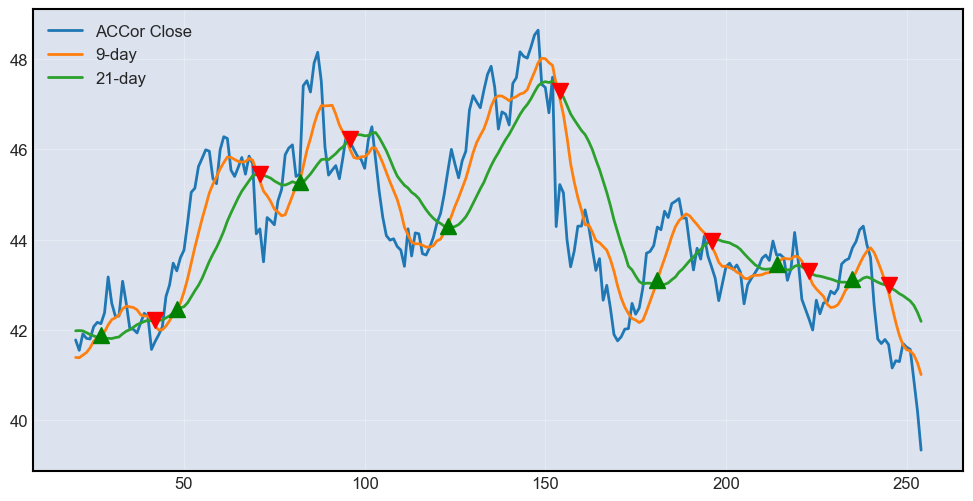

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.grid(True, alpha = 0.3)
plt.plot(df_accor.iloc[-252:]['Close'], label = 'ACCor Close')
plt.plot(df_accor.iloc[-252:]['9-day'], label = '9-day')
plt.plot(df_accor.iloc[-252:]['21-day'], label = '21-day')
plt.plot(df_accor[-252:].loc[df_accor.entry == 2].index, df_accor[-252:]['9-day'][df_accor.entry == 2], '^', color = 'g', markersize = 12)
plt.plot(df_accor[-252:].loc[df_accor.entry == -2].index, df_accor[-252:]['21-day'][df_accor.entry == -2], 'v', color = 'r', markersize = 12)
plt.legend(loc=2)

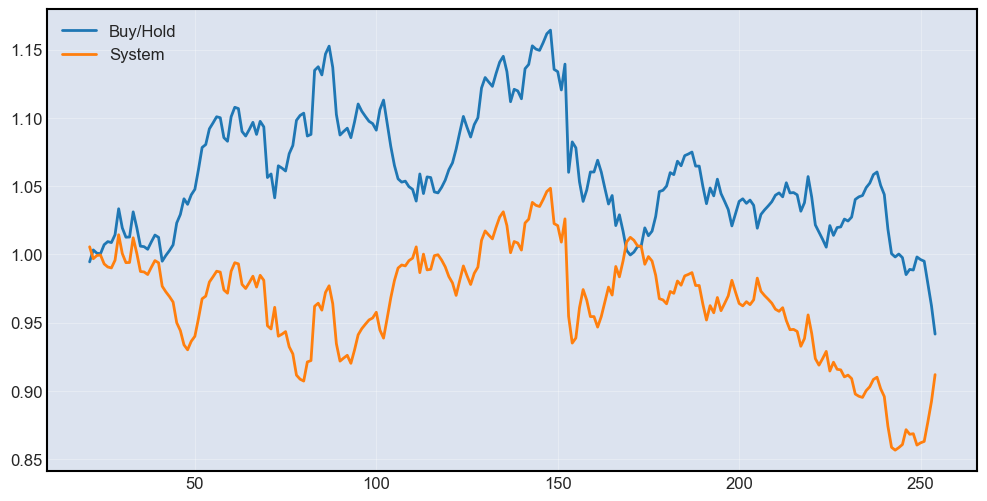

In [ ]:
plt.plot(np.exp(df_accor.return_).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(df_accor.system_return).cumprod(), label = 'System')
plt.legend(loc=2)
plt.grid(True, alpha = 0.3)


Orange bot - moving average

In [ ]:
day = np.arange(1, len(df_orange) + 1)
df_orange['day'] = day
df_orange.drop(columns=['Adj Close', 'Volume'] , inplace = True)

df_orange = df_orange[['day', 'Open', 'High', 'Low', 'Close']]
df_orange.head()

df_orange['9-day'] = df_orange['Close'].rolling(9).mean().shift()
df_orange['21-day'] = df_orange['Close'].rolling(21).mean().shift()
df_orange[19:25]

df_orange['signal'] = np.where(df_orange['9-day'] > df_orange['21-day'], 1, 0)
df_orange['signal'] = np.where(df_orange['9-day'] < df_orange['21-day'], -1, df_orange['signal'])
df_orange.dropna(inplace=True)
df_orange.head()

df_orange['return_'] = np.log(df_orange['Close']).diff()
df_orange['system_return'] = df_orange['signal'] * df_orange['return_']
df_orange['entry'] = df_orange.signal.diff()
df_orange.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return_,system_return,entry
21,22,14.135,14.265,14.120,14.175,14.125000,14.090952,1,NaN,NaN,NaN
22,23,14.160,14.260,14.095,14.255,14.111667,14.115714,-1,0.005628,-0.005628,-2.0
23,24,14.255,14.330,14.175,14.265,14.110556,14.148571,-1,0.000701,-0.000701,0.0
24,25,14.260,14.370,14.225,14.315,14.128889,14.173571,-1,0.003499,-0.003499,0.0
25,26,14.355,14.470,14.320,14.410,14.162778,14.190952,-1,0.006614,-0.006614,0.0


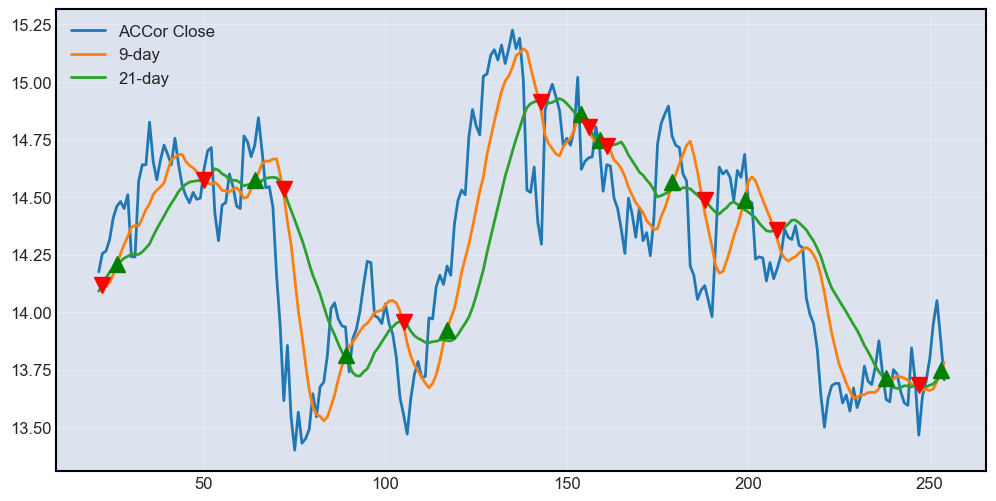

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.grid(True, alpha = 0.3)
plt.plot(df_orange.iloc[-252:]['Close'], label = 'ACCor Close')
plt.plot(df_orange.iloc[-252:]['9-day'], label = '9-day')
plt.plot(df_orange.iloc[-252:]['21-day'], label = '21-day')
plt.plot(df_orange[-252:].loc[df_orange.entry == 2].index, df_orange[-252:]['9-day'][df_orange.entry == 2], '^', color = 'g', markersize = 12)
plt.plot(df_orange[-252:].loc[df_orange.entry == -2].index, df_orange[-252:]['21-day'][df_orange.entry == -2], 'v', color = 'r', markersize = 12)
plt.legend(loc=2)

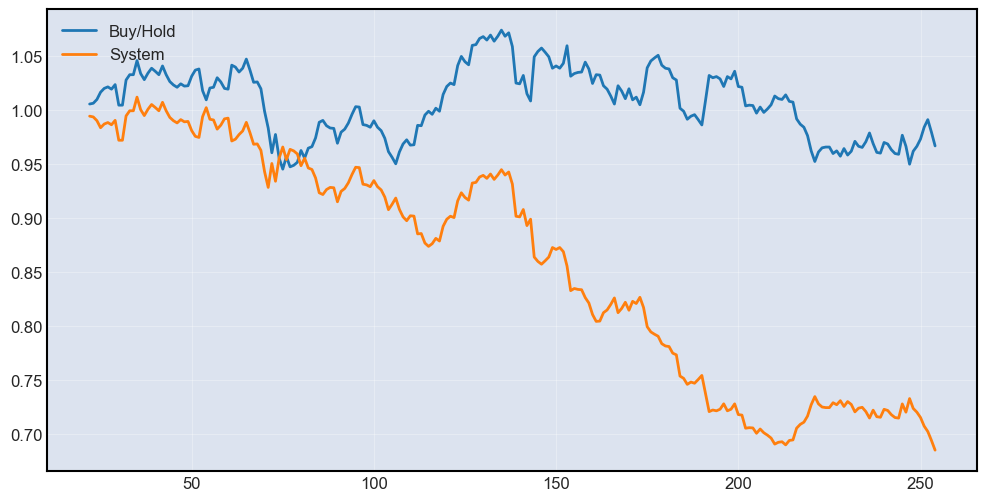

In [ ]:
plt.plot(np.exp(df_orange.return_).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(df_orange.system_return).cumprod(), label = 'System')
plt.legend(loc=2)
plt.grid(True, alpha = 0.3)